In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Lendo dados
train = pd.read_csv("../data/raw/train.csv",sep=';', decimal = ',')
test = pd.read_csv("../data/raw/test.csv",sep=';', decimal = ',')

# Verificando dimensões
print(f'Dimensões dos dados de treino: {train.shape}')
print(f'Dimensões dos dados de teste: {test.shape}')

Dimensões dos dados de treino: (1460, 81)
Dimensões dos dados de teste: (1459, 81)


In [2]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
# Dando início às análises via código, vamos estudar um pouco sobre os atributos nulos contidos neste conjunto de dados.
# Quantidade de dados nulos
train_total_null = train.isnull().sum().sum()
train_qtd_attr_null = train.isnull().any().sum()
test_total_null = test.isnull().sum().sum()
test_qtd_attr_null = test.isnull().any().sum()

# Comunicando
print(f'Atributos com dados nulos (treino): {train_qtd_attr_null}')
print(f'Total de entradas nulas (treino): {train_total_null}')
print(f'\nAtributos com dados nulos (teste): {test_qtd_attr_null}')
print(f'Total de entradas nulas (teste): {test_total_null}')

Atributos com dados nulos (treino): 19
Total de entradas nulas (treino): 6965

Atributos com dados nulos (teste): 33
Total de entradas nulas (teste): 7000


In [5]:
#Com relação a quantidade, temos praticamente o mesmo número de entradas nulas para treino e para teste.
#Quanto ao total de atirbutos com entradas nulas, o conjunto de teste apresenta um número significativamente maior.
#Vejamos detalhes sobre tais atributos.

# Analisando atributos nulos nos dados de treino
null_attr_train = [attr for attr, null in train.isnull().any().items() if null]
print(null_attr_train, end=',')
print(f'\n\nQuantidade: {len(null_attr_train)}')

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],

Quantidade: 19


In [6]:
# Analisando atributos nulos nos dados de teste
null_attr_test = [attr for attr, null in test.isnull().any().items() if null]
print(null_attr_test, end=',')
print(f'\n\nQuantidade: {len(null_attr_test)}')

['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType'],

Quantidade: 33


In [7]:
# Lendo csv com dados sobre os atributos levantados nessa pré-análise
#pre_analise = pd.read_csv('../data/descrição.csv', sep=';', index_col='nome_variavel')
#pre_analise.head()

#Detalhes da pré-análise sobre dados nulos
#qtd_null_train = [qtd for qtd in train.isnull().sum().values if qtd > 0]
#analise_null = pre_analise.loc[null_attr_train, :]
#analise_null['qtd_null'] = qtd_null_train
#analise_null.sort_values(by='qtd_null', ascending=False)

#LDB: Aqui ele faz uma análise da descrição de cada coluna fazendo um comparativo da quantidade de valores nulos que existe em cada uma.
# Não consegui encontrar o arquivo padrçao txt que ele utiliza mas ele tira a maioria dos insights para limpeza de dado dessa "pré análise"

In [8]:
#Temos quantidades diferentes de entradas nulas nos dois conjuntos de dados disponíveis (treino e teste).
#A pré-análise irá auxiliar na decisão sobre o tratamento destes dados nulos de acordo com características como quantidade, expectativa (influência) e tipo primitivo.
#Neste momento, antes de avaliar as possíveis decisões com maior profundidade, vamos analisar um ponto importante: os atributos Categóricos.

# Indexando atributos categóricos
cat_train_attribs = [attr for attr, dtype in train.dtypes.items() if dtype == 'object']
cat_test_attribs = [attr for attr, dtype in test.dtypes.items() if dtype == 'object']

# Verificando
cat_train_attribs == cat_test_attribs

True

In [9]:
#Aqui ele busca a quantidade de dados categóricos existentes no DF
# Aplicando somatório para o DF de treino
total_train_cat_entries = 0
for attr in cat_train_attribs:
    total_train_cat_entries += len(train[attr].value_counts())
    
print(f'Total de entradas categóricas nos dados de treino: {total_train_cat_entries}')

Total de entradas categóricas nos dados de treino: 252


In [10]:
# Aplicando somatório para o DF de teste
total_test_cat_entries = 0
for attr in cat_test_attribs:
    total_test_cat_entries += len(test[attr].value_counts())
    
print(f'Total de entradas categóricas nos dados de treino: {total_test_cat_entries}')

Total de entradas categóricas nos dados de treino: 234


In [11]:
#Eis um grande problema! Pensando já nas tratativas dos atributos categóricos para o treinamento do modelo, 
#a aplicação da classe One Hot Encoder do scikit-learn transforma uma feature categórica em n novas features
#de acordo com a quantidade n de entradas. Vejamos essa quantidade n por atributo.

# Criando análise com dados de treino e teste
cat_entries_info = pd.DataFrame({})
cat_train_list = []
train_null = []
cat_test_list = []
test_null = []
for attr in cat_train_attribs:
    cat_train_list.append(len(train[attr].value_counts()))
    cat_test_list.append(len(test[attr].value_counts()))
    train_null.append(train[attr].isnull().sum())
    test_null.append(test[attr].isnull().sum())

# Adicionando dados e configurando dataframe
cat_entries_info['qtd_train_entries'] = cat_train_list
cat_entries_info['qtd_null_train'] = train_null
cat_entries_info['qtd_test_entries'] = cat_test_list
cat_entries_info['qtd_null_test'] = test_null
cat_entries_info['diff'] = cat_entries_info['qtd_train_entries'] - \
cat_entries_info['qtd_test_entries']
cat_entries_info.index = cat_train_attribs

# Verificando
cat_entries_info.head()

,qtd_train_entries,qtd_null_train,qtd_test_entries,qtd_null_test,diff
MSZoning,5,0,5,4,0
Street,2,0,2,0,0
Alley,2,1369,2,1352,0
LotShape,4,0,4,0,0
LandContour,4,0,4,0,0


In [12]:
# Visualizando
cat_entries_info.sort_values(by='qtd_null_train', ascending=False, inplace=True)
cat_entries_info

,qtd_train_entries,qtd_null_train,qtd_test_entries,qtd_null_test,diff
PoolQC,3,1453,2,1456,1
MiscFeature,4,1406,3,1408,1
Alley,2,1369,2,1352,0
Fence,4,1179,4,1169,0
FireplaceQu,5,690,5,730,0
GarageType,6,81,6,76,0
GarageCond,5,81,5,78,0
GarageQual,5,81,4,78,1
GarageFinish,3,81,3,78,0
BsmtFinType2,6,38,6,42,0


In [13]:
#Temos alguns problemas:

#Atributos com grandes quantidades de dados nulos;
#Atributos com diferenças na quantidade de entradas entre os conjuntos de treino e teste (diff > 0);

#Solução 1: Deletar todos os atributos categóricos que não tenham alta influência no target e com diferença de entradas entre os dados de treino e teste, evitando problemas com o one hot encoder. O preenchimento dos dados nulos dos atributos restantes (se existirem) será dado pelas entradas mais comuns.;

#Solução 2: Deletar atributos categóricos com presença de dados nulos em uma quantidade acima de um threshold a ser determinado, independente da influência no target. O preenchimento dos dados nulos seria dado pela entrada mais comum;

#Seguindo a primeira solução, ficaríamos apenas com os atributos ExterQual, ExterCond, MSZoning, KitchenQual, CentralAir, HeatingQC e GarageType.

# Atributos categóricos mantidos
keep_cat_df = cat_entries_info.query('diff == 0')
drop_cat_df = cat_entries_info.query('diff > 0')
keep_cat_df

#O código para limpeza deveria ser filtrado a partir da classificação 'Alta' de relevância
#keep_cat_df = cat_entries_info.query('expect == "Alta" & diff == 0')
#drop_cat_df = cat_entries_info.query('expect != "Alta"')
#keep_cat_df

,qtd_train_entries,qtd_null_train,qtd_test_entries,qtd_null_test,diff
Alley,2,1369,2,1352,0
Fence,4,1179,4,1169,0
FireplaceQu,5,690,5,730,0
GarageType,6,81,6,76,0
GarageCond,5,81,5,78,0
GarageFinish,3,81,3,78,0
BsmtFinType2,6,38,6,42,0
BsmtExposure,4,38,4,44,0
BsmtFinType1,6,37,6,42,0
BsmtQual,4,37,4,44,0


In [14]:
# Filtrando colunas
drop_cat = drop_cat_df.index
train_cat_attr_filtered = train.drop(drop_cat, axis=1)

# Levantando atributos categóricos
definitive_cat_attr = [attr for attr, dtype in train_cat_attr_filtered.dtypes.items() if dtype == 'object']

# Verificando dimensões
print(f'Dataset original: {train.shape}')
print(f'Dataset filtrado: {train_cat_attr_filtered.shape}')
print(f'Total de atributos categóricos excluídos: {len(drop_cat)}')

print(f'Valores batem? {len(drop_cat) == train.shape[1] - train_cat_attr_filtered.shape[1]}')

Dataset original: (1460, 81)
Dataset filtrado: (1460, 70)
Total de atributos categóricos excluídos: 11
Valores batem? True


In [15]:
#LDB: Como não encontrei o arquivo TXT q especifica o valor 'expect' o número de categorias exlcuidas caiu de 33 para 11

# Criando função para selecionar atributos numéricos e categóricos (facilitando implementação)
def filter_attribs(X, cat=True):
    """
    seleciona os atributos de acordo com seu tipo primitivo e retorna uma lista como resultado
    """
    if cat:
        attribs = [attr for attr, dtype in X.dtypes.items() if dtype == 'object']
    else:
        attribs = [attr for attr, dtype in X.dtypes.items() if dtype != 'object']
    
    return attribs

In [16]:
# Testando função
new_cat_attribs = filter_attribs(train_cat_attr_filtered)

# Verificando se batem
print(f'Colunas categóricas (sem função): {len(definitive_cat_attr)}')
print(f'Colunas categóricas (após função): {len(new_cat_attribs)}')
print(f'Números batem? {len(definitive_cat_attr) == len(new_cat_attribs)}')

Colunas categóricas (sem função): 32
Colunas categóricas (após função): 32
Números batem? True


In [17]:
#Preenchendo Dados Nulos
#Como informado anteriormente, o preenchimento dos dados nulos será dado pelas entradas mais comuns dentro dos atributos categóricos.

# Filtrando atributos que possuem dados nulos
X = train_cat_attr_filtered.copy()
X_cat = X.loc[:, definitive_cat_attr]
X_cat.isnull().any()[X_cat.isnull().any().values].index

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCond', 'Fence'],
      dtype='object')

In [18]:
#De fato, depois da filtragem dos atributos categóricos, temos essas colunas acima contendo dados nulos. Vamos analisa-lo melhor.
#Na análise do notebook havia apenas uma coluna 'GarageType'
#E apartir disso ele avalia a classificação que mais tem valores dentro da coluna e substitui os valores por essa classificação

# Vamos analisar se é viável manter GarageType dados a quantidade de nulos
X['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [19]:
most_common = X['GarageType'].value_counts().index[0]
most_common

# Preenchendo
X['GarageType'] = X[['GarageType']].fillna(value=most_common)

#Dessa forma, é prenchido todos os valores nulos pelo valor mais representado na coluna
#Como temos outras colunas em que valores nulos estão presentes... farei o mesmo

In [20]:
most_common = X['Alley'].value_counts().index[0]
most_common
X['Alley'] = X[['Alley']].fillna(value=most_common)

most_common = X['MasVnrType'].value_counts().index[0]
most_common
X['MasVnrType'] = X[['MasVnrType']].fillna(value=most_common)

most_common = X['BsmtQual'].value_counts().index[0]
most_common
X['BsmtQual'] = X[['BsmtQual']].fillna(value=most_common)

most_common = X['BsmtCond'].value_counts().index[0]
most_common
X['BsmtCond'] = X[['BsmtCond']].fillna(value=most_common)

most_common = X['BsmtExposure'].value_counts().index[0]
most_common
X['BsmtExposure'] = X[['BsmtExposure']].fillna(value=most_common)

most_common = X['BsmtFinType1'].value_counts().index[0]
most_common
X['BsmtFinType1'] = X[['BsmtFinType1']].fillna(value=most_common)

most_common = X['BsmtFinType2'].value_counts().index[0]
most_common
X['BsmtFinType2'] = X[['BsmtFinType2']].fillna(value=most_common)

most_common = X['FireplaceQu'].value_counts().index[0]
most_common
X['FireplaceQu'] = X[['FireplaceQu']].fillna(value=most_common)

most_common = X['GarageType'].value_counts().index[0]
most_common
X['GarageType'] = X[['GarageType']].fillna(value=most_common)

most_common = X['GarageFinish'].value_counts().index[0]
most_common
X['GarageFinish'] = X[['GarageFinish']].fillna(value=most_common)

most_common = X['GarageCond'].value_counts().index[0]
most_common
X['GarageCond'] = X[['GarageCond']].fillna(value=most_common)

most_common = X['Fence'].value_counts().index[0]
most_common
X['Fence'] = X[['Fence']].fillna(value=most_common)

In [21]:
# Verificando se ainda existem dados nulos
X_cat = X.loc[:, definitive_cat_attr]
X_cat.isnull().any()[X_cat.isnull().any().values].index

Index([], dtype='object')

In [22]:
#Agora sabemos que não existem valores nulos no DF

# Criando classe para ser implementada futuramente em um pipeline
from sklearn.base import BaseEstimator, TransformerMixin

class fillCategoricalNullValues(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # Retornando colunas com dados nulos
        null_cat_attr = list(X.isnull().any()[X.isnull().any().values].index)
        
        # Retornando entradas mais comuns de cada um deles
        fill_data = {}
        for attr in null_cat_attr:
            most_common = X[attr].value_counts().index[0]
            fill_data[attr] = most_common
        
        # Preenchendo dados nulos
        new_X = X.fillna(value=fill_data)
            
        return new_X

In [23]:
# Testando
filler = fillCategoricalNullValues()
X_cat = train_cat_attr_filtered.loc[:, definitive_cat_attr]
X_filled = filler.transform(X_cat)

# Verificando
X_filled['GarageType'].isnull().any()


False

In [24]:
# Analisando como foi feito o preenchimento
X_cat['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [25]:
# Quantidade que deveria ser preenchida na entrada "Attchd"
garage_null = X_cat["GarageType"].isnull().sum()
garage_most_common = X_cat["GarageType"].value_counts().values[0]
print(f'Quantidade de nulos em GarageType: {garage_null}')
print(f'Quantidade inicial da entrada mais comum: {garage_most_common}')
print(f'Quantidade esperada final no atributo mais comum: {garage_most_common + garage_null}')

Quantidade de nulos em GarageType: 81
Quantidade inicial da entrada mais comum: 870
Quantidade esperada final no atributo mais comum: 951


In [26]:
# Tirando prova
X_filled['GarageType'].value_counts()

Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [27]:
#Perfeito! Definimos nosso pipeline para filtrar e tratar dados nulos em atributos categóricos. 
#Vejamos agora os procedimentos que serão realizados para os atributos numéricos.

# Filtrando atributos numéricos com a nova função criada
num_attribs = filter_attribs(train, cat=False)
cat_attribs = filter_attribs(train)
print(f'Quantidade de atributos numéricos (original): {len(num_attribs)}')
print(f'Quantidade de atributos categóricos (original): {len(cat_attribs)}')
print(f'Total sem alterações já realizadas: {train.shape[1]}')

Quantidade de atributos numéricos (original): 38
Quantidade de atributos categóricos (original): 43
Total sem alterações já realizadas: 81


In [28]:
# Verificando alguns
num_attribs[:5]

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual']

In [29]:
#Com os atributos numéricos devidamente indexados, vamos agora visualizar a correlação com o target SalesPrice.
#Para isso, vamos avaliar o índice de correlação por código e compará-lo a nossa análise inicial.

#Indexando dataframe
target = train['SalePrice']
X_num = train.loc[:, num_attribs]

In [30]:
# Verificando dados nulos
X_num.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [31]:
# Indexando dados nulos
null_num_attribs = X_num.isnull().any()[X_num.isnull().any().values].index
null_num_attribs

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [32]:
# Verificando estatísticas
for null_attrib in null_num_attribs:
    print(f'Àtributo: {null_attrib}')
    print(X_num[null_attrib].describe())
    print()

Àtributo: LotFrontage
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

Àtributo: MasVnrArea
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

Àtributo: GarageYrBlt
count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64



In [33]:
#Temos apenas 3 atributos numéricos com dados nulos em suas entradas.
#É papel do cientista de dados definir a melhor forma de tratar estes dados nulos. 
#Em uma primeira abordagem, vamos definir um pipeline de preenchimento de dados nulos (atributos numéricos) com a mediana do conjunto.

# Criando imputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
imputer.fit(X_num)
X_num_imputed = pd.DataFrame(imputer.transform(X_num), columns=X_num.columns)

In [34]:
# Verificando
X_num_imputed.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [35]:
#Vamos realizar algumas análises relacionadas ao target do modelo (SalePrice)
# Estatística
target.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

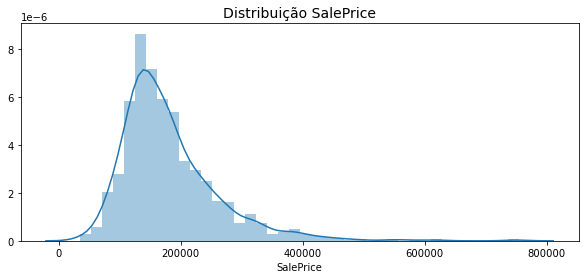

In [36]:
#Análise:
#O valor mínimo é maior que 0, ou seja, não é necessário de preocupar com particularidades durante a construção do modelo;

# Distribuição
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(figsize=(10, 4))
ax = sns.distplot(target, bins=40)

ax.set_title('Distribuição SalePrice', size=14)
plt.show()

In [37]:
# Métricas de similaridade
skewness = target.skew()
kurtosis = target.kurt()
print(f'Skewness: {skewness:.4f}')
print(f'Kurtosis: {kurtosis:.4f}')

Skewness: 1.8829
Kurtosis: 6.5363


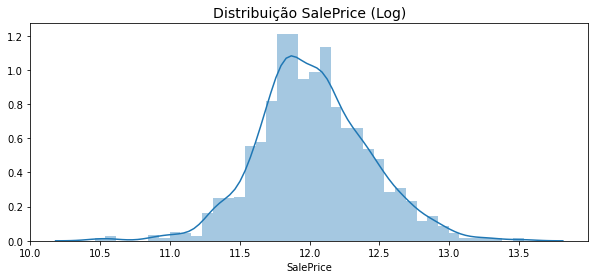

Skewness: 0.1213
Kurtosis: 0.8095


In [38]:
#Análise:
#A variável target difere da distribuição normal
#Temos as medidas de Skewness (Assimetria) ou Obliquidade) e Kurtosis (Curtose ou Achatamento) que indicam:
#Skewness
#positivo: long tail à direita;
#negativo: long tail à esquerda;
#igual a 0: distribuição aproximadamente simétrica.
#Kurtosis
#igual a 3: achatamento de uma distribuição normal;
#maior que 3: distribuição mais alta (afunilada);
#menor que 3: distribuição mais achatada que a normal.

# Transformando
import numpy as np

target_log = np.log(target)
fig, ax = plt.subplots(figsize=(10, 4))
ax = sns.distplot(target_log, bins=40)

ax.set_title('Distribuição SalePrice (Log)', size=14)
plt.show()

# Comunicando métricas skewness e kurtosis
print(f'Skewness: {target_log.skew():.4f}')
print(f'Kurtosis: {target_log.kurt():.4f}')

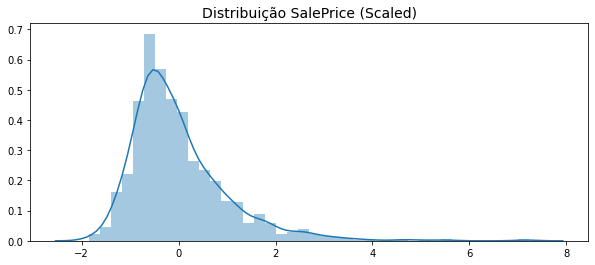

Skewness: 1.8829
Kurtosis: 6.5363


In [39]:
# Testando
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
target_scaled = target.copy()
target_scaled = scaler.fit_transform(pd.DataFrame(target_scaled))

# Plotando
fig, ax = plt.subplots(figsize=(10, 4))
ax = sns.distplot(target_scaled, bins=40)
ax.set_title('Distribuição SalePrice (Scaled)', size=14)
plt.show()

# Comunicando métricas skewness e kurtosis
print(f'Skewness: {pd.Series(list(target_scaled)).skew():.4f}')
print(f'Kurtosis: {pd.Series(list(target_scaled)).kurt():.4f}')

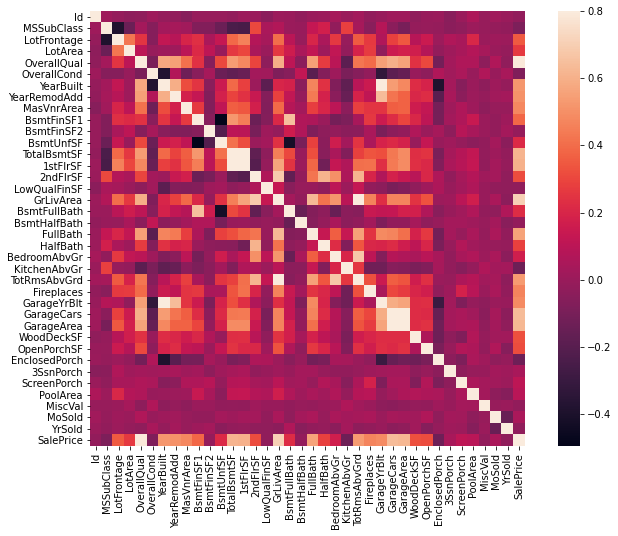

In [40]:
#Com a análise a partir dos dados padronizados, obtivemos a mesma curva e as mesmas métricas obtidas com os dados sem nenhum tratamento.
#Vamos agora retornar os atributos numéricos e analisar a influência estabelecida na pré-análise



# Matriz de correlação
corrmat = train.corr()
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corrmat, vmax=.8, square=True)

In [41]:
#Antes de comentar sobre o resultado obtido com a matriz acima, é necessário entender que:
#Quadrados claros indicam uma forte correlação positiva;
#Quadrados escuros indicam uma forte correlação negativa.
#1º ponto: forte correlação positiva entre os atributos TotalBsmtSF e 1stFlrSF
#2º ponto: forte correlação positiva entre os atributos GarageCars e GarageArea

#Essa forte correlação positiva entre atributos indica uma situação de multicolinearidade. 
#Isso indica que, possivelmente, tais atributos podem estar representando a mesma informação, o que indesejável para o modelo.
#Um outro ponto extremamente importante diz respeito às variáveis que possuem alta correlação
#com nosso target SalePrice, sendo estas: OverallQual, GrLivarea, GarageCars, GarageArea e mais algumas.

corrmat.nlargest(10, 'SalePrice')['SalePrice'].index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

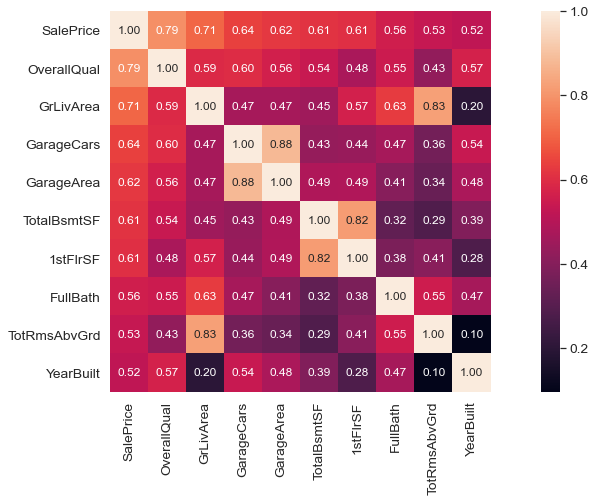

In [42]:
#Top 10 atributos com maior correlação com o target
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(18, 7))
ax = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()


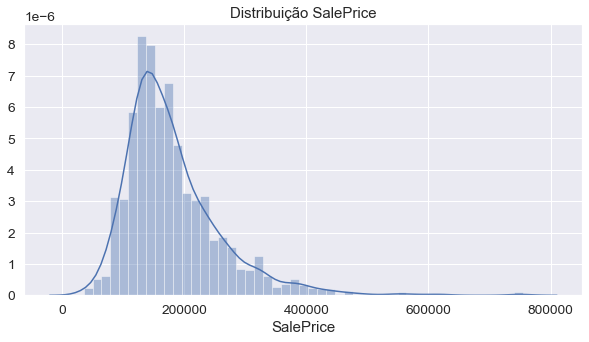

In [43]:
#OverallQual: Ok. Mencionamos, em tópicos anteriores, que este atributo poderia ser muito importante para a análise;
#GrLivArea: A sala de estar realmente importa para a construção do preço da casa e sua respectiva venda. Faz sentido.
#GarageCars e GarageArea: Aparentemente o espaço proporcionado pela garagem causa bastante influência no preço de venda da casa. Porém, como discutido acima, ambos são atributos com alta correlação entre si, dado que a área calculada da garagem é baseada na quantidade de carros que esta comporta. Podemos simplesmente manter o atributo GarageCars, uma vez que sua correlação com o target SalePrice é maior.
#TotalBsmtSF e 1stFlrSF: Assim como no caso acima, ambos são atributos com alta correlação entre si. Iremos manter TotalBsmtSF com a mesma justificativa do tópico logo acima.
#FullBath: Ok, de certa forma isso era esperado. A quantidade de banheiros em uma casa realmente possui influência em seu preço de venda;
#TotRmsAbvGrd: Também trazendo total sentido, a quantidade de quartos é importante para o cálculo do preço da casa.
#YearBuilt: Também concordo que o ano de construção da casa pode influenciar em seu preço.

# Vejamos algumas distribuições
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.distplot(target)
ax.set_title('Distribuição SalePrice', size=15)
plt.show()


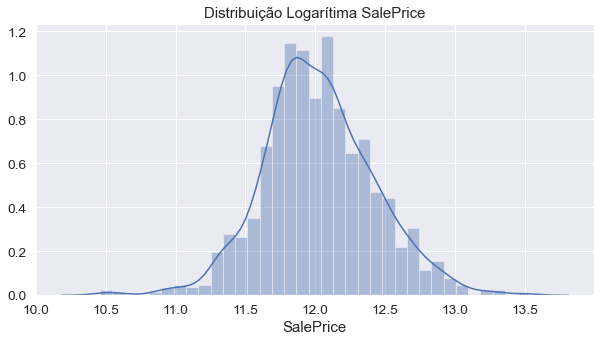

In [44]:
# Aplicando transformação logarítima
target_log = np.log(target+1)
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.distplot(target_log)
ax.set_title('Distribuição Logarítima SalePrice', size=15)
plt.show()

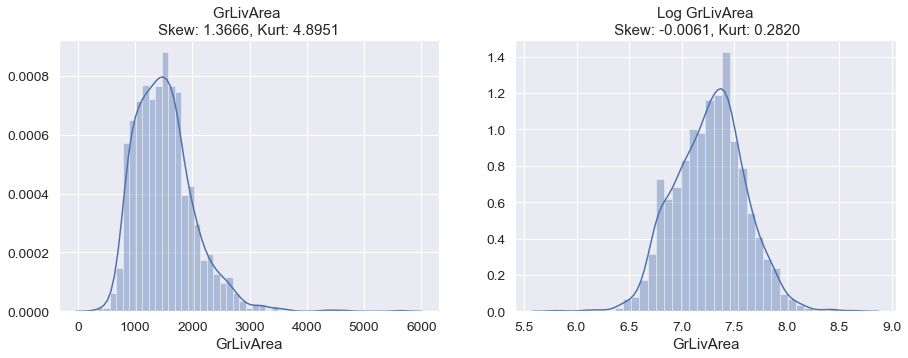

In [45]:
# Aplicando transformação logarítima
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

attribute = X_num['GrLivArea']
log_attribute = np.log(attribute+1)

sns.distplot(attribute, ax=axs[0])
skew = attribute.skew()
kurt = attribute.kurt()
axs[0].set_title(f'GrLivArea \nSkew: {skew:.4f}, Kurt: {kurt:.4f}', size=15)

sns.distplot(log_attribute, ax=axs[1])
log_skew = log_attribute.skew()
log_kurt = log_attribute.kurt()
axs[1].set_title(f'Log GrLivArea\n Skew: {log_skew:.4f}, Kurt: {log_kurt:.4f}', size=15)
plt.show()

IndexError: index 9 is out of bounds for axis 0 with size 9

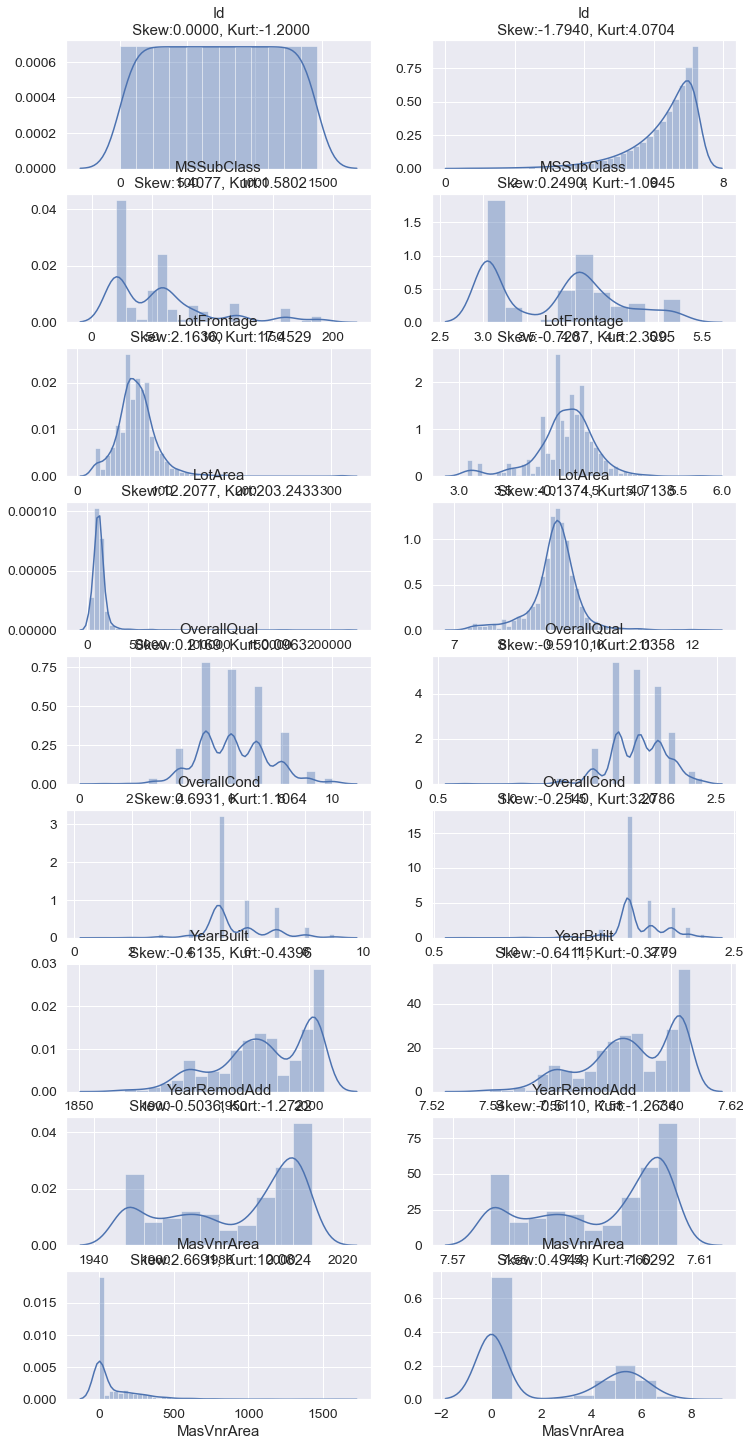

In [46]:
#Temos as medidas de Skewness (Assimetria) ou Obliquidade) e Kurtosis (Curtose ou Achatamento) que indicam:
#Skewness
#positivo: long tail à direita;
#negativo: long tail à esquerda;
#igual a 0: distribuição aproximadamente simétrica.
#Kurtosis
#igual a 3: achatamento de uma distribuição normal;
#maior que 3: distribuição mais alta (afunilada);
#menor que 3: distribuição mais achatada que a normal.
#Segundo o usuário deja vu em seu kernel House Prices: EDA to ML (Beginner), a falta de simetria na distribuição do target
#SalePrice pode reduzir a performance do modelo de Machine Learning, dado que os modelos de regressão assumem uma distribuição
#normal. Utilizando funcionalidades do numpy, é possível aplicar uma transformação logarítimica nos dados. Vejamos:

# Verificando em todos os atributos
fig, axs = plt.subplots(nrows=9, ncols=2, figsize=(12, 25))
columns = list(X_num.columns)
i = 0

for col in columns:
    # Calculando parâmetros
    attribute = X_num[col]
    skew = attribute.skew()
    kurt = attribute.kurt()
    log_attribute = np.log1p(attribute)
    log_skew = log_attribute.skew()
    log_kurt = log_attribute.kurt()
    
    # Plotando gráficos
    sns.distplot(attribute, ax=axs[i, 0])
    sns.distplot(log_attribute, ax=axs[i, 1])
    
    # Configurando plotagens
    attr_name = columns[i]
    axs[i, 0].set_title(f'{attr_name}\n Skew:{skew:.4f}, Kurt:{kurt:.4f}')
    axs[i, 1].set_title(f'{attr_name}\n Skew:{log_skew:.4f}, Kurt:{log_kurt:.4f}')
    i += 1

plt.tight_layout()
plt.show()

In [47]:
# Importando bibliotecas para métricas
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Preparando dados de teste para futuras avaliações
X_test_prepared = full_pipeline.fit_transform(X_test)

NameError: name 'full_pipeline' is not defined